Nama    : Aphrodity Nirmala Putri

NIM     : 23/511906/PA/21852

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import sympy as sp
import control as ct
from control.matlab import tf2ss, ss2zpk
from scipy.linalg import eig

1. 

In [187]:
num = [1, 20]
den = [1, 19, 80, -100]
sys = ct.tf(num, den)
print("Transfer function:")
print(sys)

Transfer function:
<TransferFunction>: sys[1338]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


         s + 20
-------------------------
s^3 + 19 s^2 + 80 s - 100



1. a. 

Gain margin (dB): 13.98 dB
Gain crossover frequency (rad/s): 0.0000
K maksimum untuk stabilitas: 5.0000


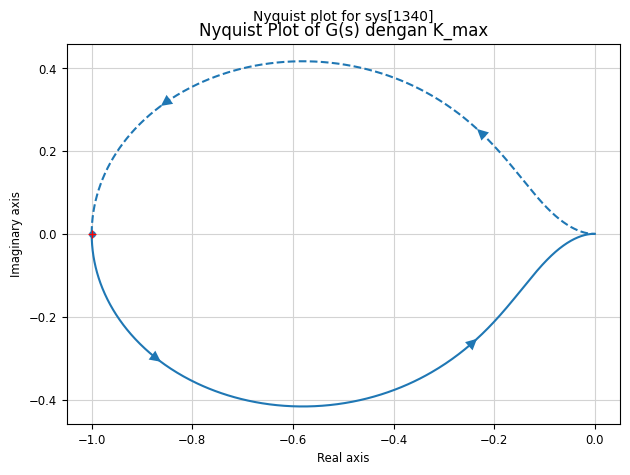

In [188]:
gm, pm, wg, wp = ct.margin(sys)

# Cek dan print Gain Margin
if gm != np.inf:
    GM_dB = 20 * np.log10(gm)
    print(f"Gain margin (dB): {GM_dB:.2f} dB")
    print(f"Gain crossover frequency (rad/s): {wg:.4f}")
    K_max = gm
else:
    print("Gain margin: inf (sistem sudah stabil tanpa batasan)")
    K_max = 1  # Set K_max = 1 kalau GM inf

print(f"K maksimum untuk stabilitas: {K_max:.4f}")

G_1 = sys * K_max

plt.figure()
ct.nyquist_plot(G_1, label='G(s) dengan K_max')
plt.title('Nyquist Plot of G(s) dengan K_max')
plt.grid(True)
plt.show()

1. b. 

In [189]:
gm = 64.2
fwm = 41.2

Kcr = ct.db2mag(gm)
Pcr = 2 * np.pi / fwm
print(f"Kcr: {Kcr:.4f}")
print(f"Pcr: {Pcr:.4f} rad/s")

Kcr: 1621.8101
Pcr: 0.1525 rad/s


1. c. 

Kp: 973.0861
Td: 0.0191
Gc: <TransferFunction>: sys[1350]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


18.55 s + 973.1
---------------
       1

G_cl: <TransferFunction>: sys[1353]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   18.55 s^2 + 1344 s + 1.946e+04
------------------------------------
s^3 + 37.55 s^2 + 1424 s + 1.936e+04



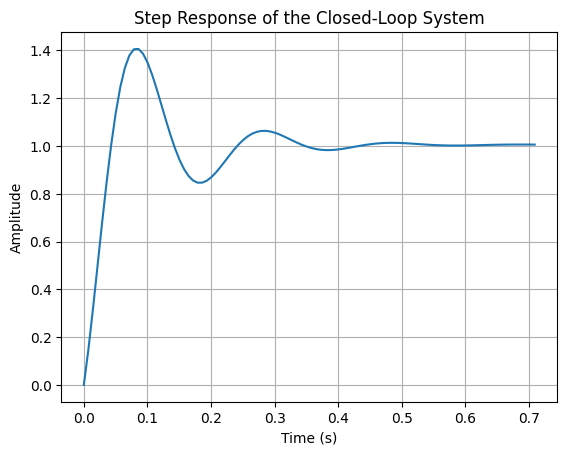

In [190]:
# Calculate PID parameters
Kp = 0.6 * Kcr
Td = 0.125 * Pcr
print(f"Kp: {Kp:.4f}")
print(f"Td: {Td:.4f}")
# Define the PID controller Gc
s = ct.TransferFunction.s
Gc = Kp * (1 + (Td * s))
G_cl1 = ct.feedback(Gc * sys, 1)
print (f"Gc: {Gc}")
print (f"G_cl: {G_cl1}")
t, y = ct.step_response(G_cl1)
plt.figure()
plt.plot(t, y)
plt.title("Step Response of the Closed-Loop System")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

1. d. 

Kp: 729.8145
Ti: 0.1271
Gc: <TransferFunction>: sys[1363]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


92.75 s + 729.8
---------------
   0.1271 s

G_cl: <TransferFunction>: sys[1366]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


            92.75 s^2 + 2585 s + 1.46e+04
------------------------------------------------------
0.1271 s^4 + 2.415 s^3 + 102.9 s^2 + 2572 s + 1.46e+04



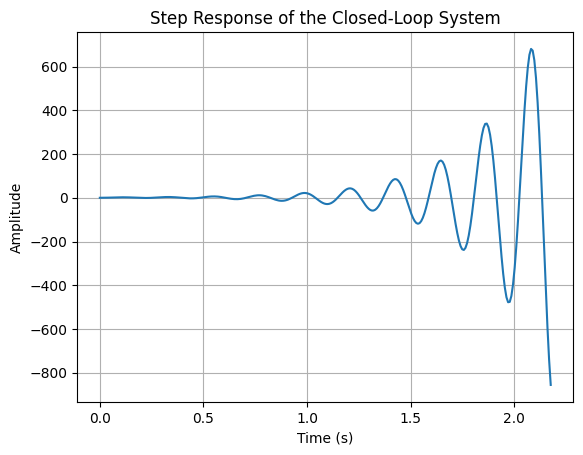

In [191]:
# Calculate PID parameters
Kp = 0.45 * Kcr
Ti = 1/1.2 * Pcr
print(f"Kp: {Kp:.4f}")
print(f"Ti: {Ti:.4f}")
# Define the PID controller Gc
s = ct.TransferFunction.s
Gc = Kp * (1 + (1 / (Ti * s)))
G_cl2 = ct.feedback(Gc * sys, 1)
print (f"Gc: {Gc}")
print (f"G_cl: {G_cl2}")
t, y = ct.step_response(G_cl2)
plt.figure()
plt.plot(t, y)
plt.title("Step Response of the Closed-Loop System")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

1. e. 

Kp: 973.0861
Ti: 0.0763
Td: 0.0191
Gc: <TransferFunction>: sys[1379]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1.414 s^2 + 74.2 s + 973.1
--------------------------
        0.07625 s

G_cl: <TransferFunction>: sys[1382]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


       1.414 s^3 + 102.5 s^2 + 2457 s + 1.946e+04
--------------------------------------------------------
0.07625 s^4 + 2.863 s^3 + 108.6 s^2 + 2449 s + 1.946e+04



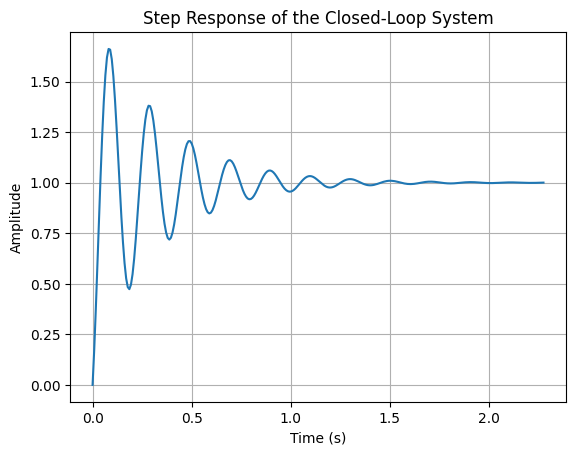

In [192]:
# Calculate PID parameters
Kp = 0.6 * Kcr
Ti = 0.5 * Pcr
Td = 0.125 * Pcr
print(f"Kp: {Kp:.4f}")
print(f"Ti: {Ti:.4f}")
print(f"Td: {Td:.4f}")
# Define the PID controller Gc
s = ct.TransferFunction.s
Gc = Kp * (1 + 1 / (Ti * s) + Td * s)
G_cl3 = ct.feedback(Gc * sys, 1)
print (f"Gc: {Gc}")
print (f"G_cl: {G_cl3}")
t, y = ct.step_response(G_cl3)
plt.figure()
plt.plot(t, y)
plt.title("Step Response of the Closed-Loop System")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

1. f. 

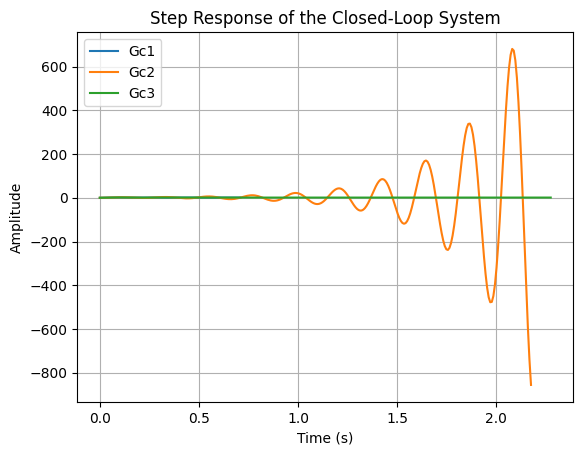

In [193]:
t1, y1 = ct.step_response(G_cl1)
t2, y2 = ct.step_response(G_cl2)
t3, y3 = ct.step_response(G_cl3)

plt.figure()
plt.plot(t1, y1, label='Gc1')
plt.plot(t2, y2, label='Gc2')
plt.plot(t3, y3, label='Gc3')
plt.title("Step Response of the Closed-Loop System")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

2. 

In [194]:
num = [18, 360]
den = [1, 3, -18]
sys1 = ct.tf(num, den)
print("Transfer function:")
print(sys)

Transfer function:
<TransferFunction>: sys[1338]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


         s + 20
-------------------------
s^3 + 19 s^2 + 80 s - 100



2. a. 

Gain margin (dB): -26.02 dB
Gain crossover frequency (rad/s): 0.0000
K maksimum untuk stabilitas: 0.0500


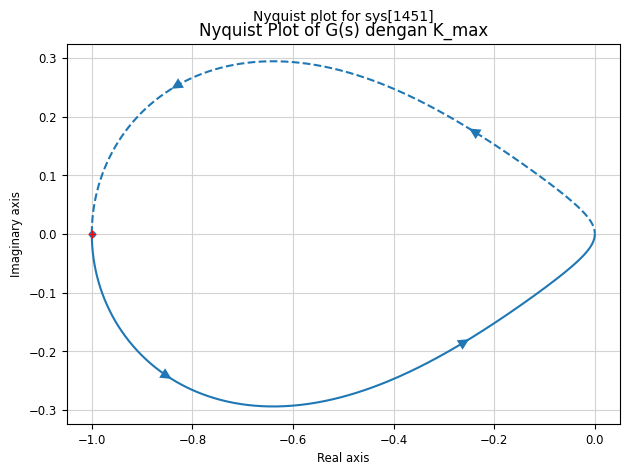

In [202]:
gm, pm, wg, wp = ct.margin(sys1)

# Cek dan print Gain Margin
if gm != np.inf:
    GM_dB = 20 * np.log10(gm)
    print(f"Gain margin (dB): {GM_dB:.2f} dB")
    print(f"Gain crossover frequency (rad/s): {wg:.4f}")
    K_max = gm
else:
    print("Gain margin: inf (sistem sudah stabil tanpa batasan)")
    K_max = 1  # Set K_max = 1 kalau GM inf

print(f"K maksimum untuk stabilitas: {K_max:.4f}")

G_1 = sys1 * K_max

plt.figure()
ct.nyquist_plot(G_1, label='G(s) dengan K_max')
plt.title('Nyquist Plot of G(s) dengan K_max')
plt.grid(True)
plt.show()

2. b.

In [196]:
gm = -26
fwm = 22.9

Kcr = ct.db2mag(gm)
Pcr = 2 * np.pi / fwm
print(f"Kcr: {Kcr:.4f}")
print(f"Pcr: {Pcr:.4f} rad/s")

Kcr: 0.0501
Pcr: 0.2744 rad/s


2. c. 

Kp: 0.0301
Td: 0.0343
Gc: <TransferFunction>: sys[1403]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.001031 s + 0.03007
--------------------
         1

G_cl: <TransferFunction>: sys[1406]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.001031 s^2 + 0.0507 s + 0.6014
--------------------------------
 s^3 + 19 s^2 + 80.05 s - 99.4



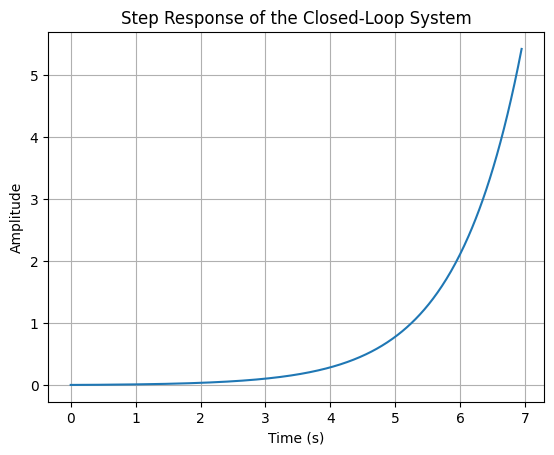

In [197]:
# Calculate PID parameters
Kp = 0.6 * Kcr
Td = 0.125 * Pcr
print(f"Kp: {Kp:.4f}")
print(f"Td: {Td:.4f}")
# Define the PID controller Gc
s = ct.TransferFunction.s
Gc = Kp * (1 + (Td * s))
G_cl1 = ct.feedback(Gc * sys, 1)
print (f"Gc: {Gc}")
print (f"G_cl: {G_cl1}")
t, y = ct.step_response(G_cl1)
plt.figure()
plt.plot(t, y)
plt.title("Step Response of the Closed-Loop System")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

2. d.

Kp: 0.0226
Ti: 0.2286
Gc: <TransferFunction>: sys[1416]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.005157 s + 0.02255
--------------------
      0.2286 s

G_cl: <TransferFunction>: sys[1419]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


          0.005157 s^2 + 0.1257 s + 0.4511
----------------------------------------------------
0.2286 s^4 + 4.344 s^3 + 18.3 s^2 - 22.74 s + 0.4511



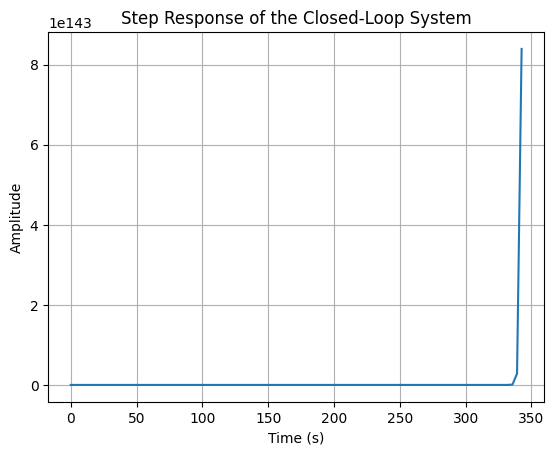

In [198]:
# Calculate PID parameters
Kp = 0.45 * Kcr
Ti = 1/1.2 * Pcr
print(f"Kp: {Kp:.4f}")
print(f"Ti: {Ti:.4f}")
# Define the PID controller Gc
s = ct.TransferFunction.s
Gc = Kp * (1 + (1 / (Ti * s)))
G_cl2 = ct.feedback(Gc * sys, 1)
print (f"Gc: {Gc}")
print (f"G_cl: {G_cl2}")
t, y = ct.step_response(G_cl2)
plt.figure()
plt.plot(t, y)
plt.title("Step Response of the Closed-Loop System")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

2. e. 

Kp: 0.0301
Ti: 0.1372
Td: 0.0343
Gc: <TransferFunction>: sys[1432]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.0001415 s^2 + 0.004125 s + 0.03007
------------------------------------
              0.1372 s

G_cl: <TransferFunction>: sys[1435]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  0.0001415 s^3 + 0.006955 s^2 + 0.1126 s + 0.6014
-----------------------------------------------------
0.1372 s^4 + 2.607 s^3 + 10.98 s^2 - 13.61 s + 0.6014



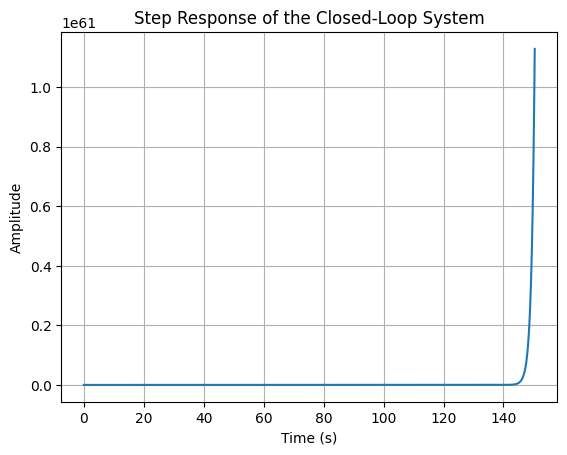

In [199]:
# Calculate PID parameters
Kp = 0.6 * Kcr
Ti = 0.5 * Pcr
Td = 0.125 * Pcr
print(f"Kp: {Kp:.4f}")
print(f"Ti: {Ti:.4f}")
print(f"Td: {Td:.4f}")
# Define the PID controller Gc
s = ct.TransferFunction.s
Gc = Kp * (1 + 1 / (Ti * s) + Td * s)
G_cl3 = ct.feedback(Gc * sys, 1)
print (f"Gc: {Gc}")
print (f"G_cl: {G_cl3}")
t, y = ct.step_response(G_cl3)
plt.figure()
plt.plot(t, y)
plt.title("Step Response of the Closed-Loop System")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

2. f. 

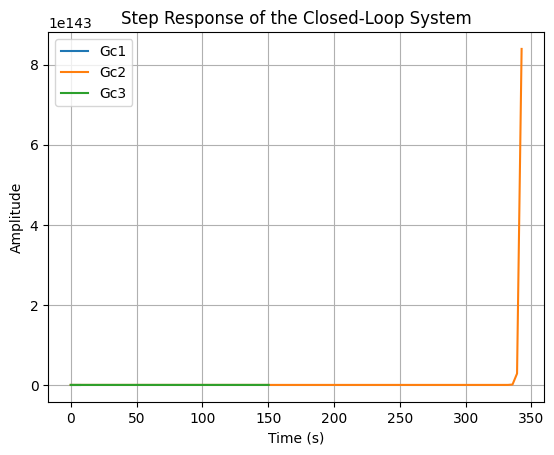

In [200]:
t1, y1 = ct.step_response(G_cl1)
t2, y2 = ct.step_response(G_cl2)
t3, y3 = ct.step_response(G_cl3)

plt.figure()
plt.plot(t1, y1, label='Gc1')
plt.plot(t2, y2, label='Gc2')
plt.plot(t3, y3, label='Gc3')
plt.title("Step Response of the Closed-Loop System")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()